<center><h1>Alshehri_Asma_HW7</h1></center>

Name: Asma Alshehri
<br>
Github Username: Asma-571
<br>
USC ID: 5168462498

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, hamming_loss, make_scorer, silhouette_score
from imblearn.over_sampling import SMOTE
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
# %pip install -U imbalanced-learn

### (a) Download the Anuran Calls (MFCCs) Data Set

In [ ]:
data = pd.read_csv('./Frogs_MFCCs.csv')
data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


*The "RecordID" column serves as an identifier for each recorded anuran call. Since it does not carry any meaningful information for the classification task, we should drop this column from the dataset*

In [ ]:
data = data.drop('RecordID',axis=1)

In [ ]:

features = data.drop(columns=["Family", "Genus", "Species"])
labels = data[["Family", "Genus", "Species"]]

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=42)

In [ ]:

scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

### (b) Train a classifier for each label

#### (i) Research

Exact Match:
The Exact Match metric, also known as Subset Accuracy or Exact Match Ratio, is the strictest evaluation metric for multi-label classification problems. It measures the ratio of instances where the predicted label set is exactly the same as the true label set. In other words, a prediction is considered correct only if all the labels are predicted correctly.

Hamming Score/Loss:
Hamming score (or loss) is another evaluation metric for multi-label classification. It measures the average per-label accuracy, i.e., the ratio of correctly predicted labels to the total number of labels. It is a more lenient metric than Exact Match, as it considers the individual label accuracies instead of requiring a perfect match of the entire label set. Note that Hamming Loss is the complement of Hamming Score, so a lower Hamming Loss indicates better performance.

#### (ii) Train a SVM for each of the labels

*Method 1: Uses nested loops and StratifiedKFold to find optimal SVM hyperparameters (C and gamma) and calculates average Hamming loss per category.*

In [ ]:
reg_penalty = [10 ** i for i in range(-3,6)]
gaussian_kernel_values = np.arange(0.1,2.01,0.1)
label_categories = [['Family'], ['Genus'], ['Species']]
strat_kfold = StratifiedKFold(n_splits=10)

In [ ]:
reg_penalty_list = []
gaussian_kernel_list = []
for C in reg_penalty:
    for gamma in gaussian_kernel_values:
        reg_penalty_list.append(C)
        gaussian_kernel_list.append(gamma)

category_df_list = []
for category in label_categories:
    train_labels_category = train_labels[category]
    
    loss_range = []
    for C in reg_penalty:
        for gamma in gaussian_kernel_values:
            
            loss_splits = []
            for train_index, test_index in strat_kfold.split(train_features_scaled, train_labels_category):
                
                train_cv, test_cv = train_features_scaled[train_index], train_features_scaled[test_index]
                labels_train_cv, labels_test_cv = train_labels_category.iloc[train_index], train_labels_category.iloc[test_index]

                clf = svm.SVC(kernel="rbf", C=C, gamma=gamma, decision_function_shape='ovr').fit(train_cv, labels_train_cv.values.flatten())
                
                pred = clf.predict(test_cv)
                loss_splits.append(hamming_loss(labels_test_cv, pred))
            
            loss_range.append(np.mean(loss_splits))
        
    category_df = pd.DataFrame({'C':reg_penalty_list, 
                             'Gamma':gaussian_kernel_list, 
                             'Hamming Loss':loss_range})
    category_df = category_df.sort_values(by='Hamming Loss')
    print(category)
    print(category_df.head(1))
    category_df_list.append(category_df)

['Family']
         C  Gamma  Hamming Loss
100  100.0    0.1      0.008935
['Genus']
       C  Gamma  Hamming Loss
80  10.0    0.1      0.012312
['Species']
       C  Gamma  Hamming Loss
80  10.0    0.1       0.01529


*Method 2: Finds suitable C and gamma ranges, performs grid search with KFold cross-validation, and reports mean exact match and Hamming loss scores.*

In [ ]:
def find_suitable_ranges(train_features, train_labels, threshold=0.7):
    C_candidates = np.logspace(-6, 9, 16)
    gamma_candidates = np.logspace(-6, 3, 10)

    suitable_C = []
    suitable_gamma = []

    for C in C_candidates:
        acc_scores = []
        for label in train_labels.columns:
            svm = SVC(kernel='rbf', C=C)
            clf = OneVsRestClassifier(svm)
            clf.fit(train_features, train_labels[label])
            acc = accuracy_score(train_labels[label], clf.predict(train_features))
            acc_scores.append(acc)
        if np.mean(acc_scores) >= threshold:
            suitable_C.append(C)

    for gamma in gamma_candidates:
        acc_scores = []
        for label in train_labels.columns:
            svm = SVC(kernel='rbf', gamma=gamma)
            clf = OneVsRestClassifier(svm)
            clf.fit(train_features, train_labels[label])
            acc = accuracy_score(train_labels[label], clf.predict(train_features))
            acc_scores.append(acc)
        if np.mean(acc_scores) >= threshold:
            suitable_gamma.append(gamma)

    return suitable_C, suitable_gamma


In [ ]:
def grid_search_svm(train_features, train_labels, suitable_C, suitable_gamma):
    param_grid = {'estimator__C': suitable_C, 'estimator__gamma': suitable_gamma}

    svm = SVC(kernel='rbf')
    clf = OneVsRestClassifier(svm)
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    grid = GridSearchCV(clf, param_grid, cv=kf, n_jobs=-1, scoring=make_scorer(accuracy_score), verbose=2)
    grid.fit(train_features, train_labels)

    return grid.best_params_, grid.best_score_

In [ ]:
def evaluate_classifiers(train_features, train_labels, test_features, test_labels, best_params):
    exact_match = []
    hamming_losses = []

    for label in labels.columns:
        svm = SVC(kernel='rbf', C=best_params[label]['estimator__C'], gamma=best_params[label]['estimator__gamma'])
        clf = OneVsRestClassifier(svm)
        clf.fit(train_features, train_labels[label])
        predicted_labels = clf.predict(test_features)

        exact_match_score = accuracy_score(test_labels[label], predicted_labels)
        hamming_loss_score = hamming_loss(test_labels[label], predicted_labels)

        exact_match.append(exact_match_score)
        hamming_losses.append(hamming_loss_score)

        print(f"Label: {label}")
        print(f"Exact match: {exact_match_score}")
        print(f"Hamming loss: {hamming_loss_score}")
        print("-" * 20)

    return np.mean(exact_match), np.mean(hamming_losses)


In [ ]:
suitable_C, suitable_gamma = find_suitable_ranges(train_features, train_labels)
print("Suitable C:", suitable_C)
print("Suitable gamma:", suitable_gamma)

# Perform grid search for each label
best_params = {}
for label in labels.columns:
    print(f"Performing grid search for label: {label}")
    best_params[label], best_score = grid_search_svm(train_features, train_labels[label], suitable_C, suitable_gamma)
    print(f"Best parameters for label {label}: {best_params[label]}, best score: {best_score}")

# Evaluate classifiers and report results
mean_exact_match, mean_hamming_loss = evaluate_classifiers(train_features, train_labels, test_features, test_labels, best_params)
print(f"Mean exact match: {mean_exact_match}")
print(f"Mean Hamming loss: {mean_hamming_loss}")


Suitable C: [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0, 100000000.0, 1000000000.0]
Suitable gamma: [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
Performing grid search for label: Family
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best parameters for label Family: {'estimator__C': 1000.0, 'estimator__gamma': 1.0}, best score: 0.9924547950392881
Performing grid search for label: Genus
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best parameters for label Genus: {'estimator__C': 10.0, 'estimator__gamma': 1.0}, best score: 0.9910666950676891
Performing grid search for label: Species
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best parameters for label Species: {'estimator__C': 10.0, 'estimator__gamma': 1.0}, best score: 0.9906698696708638
Label: Family
Exact match: 0.9958314034275128
Hamming loss: 0.0041685965724872626
--------------------
Label: Genus
Exact match: 0.9902732746641963
Hamming loss: 0.0097267

In [ ]:
C_range = np.logspace(-3, 6, 10)
gamma_range = np.linspace(0.1, 2, 20)
param_grid = dict(estimator__C=C_range, estimator__gamma=gamma_range)


In [ ]:
svc = SVC(kernel='rbf')
ovr_svc = OneVsRestClassifier(svc)


In [ ]:
def train_classifier(train_features, train_labels, test_features, test_labels, label_name):
    svc = SVC(kernel='rbf')
    param_grid = dict(C=C_range, gamma=gamma_range)

    cv = StratifiedKFold(n_splits=10)
    grid = GridSearchCV(svc, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
    grid.fit(train_features, train_labels)

    predicted_labels = grid.predict(test_features)
    accuracy = accuracy_score(test_labels, predicted_labels)
    loss = hamming_loss(test_labels, predicted_labels)

    print(f"{label_name} Best parameters: {grid.best_params_}")
    print(f"{label_name} Exact Match: {accuracy}")
    print(f"{label_name} Hamming Score/Loss: {loss}")
    return grid


In [ ]:
label_names = ["Family", "Genus", "Species"]
classifiers = []

for label_name in label_names:
    classifier = train_classifier(train_features, train_labels[label_name], test_features, test_labels[label_name], label_name)
    classifiers.append(classifier)


Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Family Best parameters: {'C': 10.0, 'gamma': 0.1}
Family Exact Match: 0.9925891616489115
Family Hamming Score/Loss: 0.007410838351088467
Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Genus Best parameters: {'C': 10.0, 'gamma': 0.1}
Genus Exact Match: 0.9879573876794813
Genus Hamming Score/Loss: 0.012042612320518759
Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Species Best parameters: {'C': 10.0, 'gamma': 0.1}
Species Exact Match: 0.984251968503937
Species Hamming Score/Loss: 0.015748031496062992


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Set the range of penalty weights
penalty_range = [10 ** i for i in range(-4,5)]

# Define the parameter grid for GridSearchCV
param_grid = {'C': penalty_range}

In [ ]:
# Initialize lists to store the hamming loss and penalty weights for each output label class
class_results = []
for class_labels in [['Family'],['Genus'],['Species']]:
    y_train_class = y_train[class_labels]
    
    # Perform GridSearchCV to find the best penalty weight for the current output label class
    clf = GridSearchCV(LinearSVC(penalty='l1', dual=False), param_grid, cv=10, n_jobs=-1)
    clf.fit(X_train_std, y_train_class.values.ravel())
    
    # Get the best penalty weight and fit the model using the entire training set
    best_penalty = clf.best_params_['C']
    svm = LinearSVC(penalty='l1', dual=False, C=best_penalty)
    svm.fit(X_train_std, y_train_class.values.ravel())
    
    # Make predictions on the test set and calculate the hamming loss
    y_pred = svm.predict(X_test_std)
    hamming_loss_val = hamming_loss(y_test[class_labels], y_pred)
    
    # Store the results in a dataframe and append to the class_results list
    results = pd.DataFrame({'Penalty Weight': [best_penalty], 'Hamming Loss': [hamming_loss_val]})
    print(class_labels)
    display(results)
    class_results.append(results)

['Family']


,Penalty Weight,Hamming Loss
0,100,0.060213


['Genus']


,Penalty Weight,Hamming Loss
0,1,0.051413


['Species']


,Penalty Weight,Hamming Loss
0,10000,0.044465


In [ ]:
scaler = StandardScaler()
train_features_std = scaler.fit_transform(train_features)
test_features_std = scaler.transform(test_features)


In [ ]:
def train_l1_penalized_classifier(train_features, train_labels, test_features, test_labels, label_name):
    l1_svc = LinearSVC(penalty='l1', loss='squared_hinge', dual=False)
    param_grid = dict(C=C_range)

    cv = StratifiedKFold(n_splits=10)
    grid = GridSearchCV(l1_svc, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
    grid.fit(train_features, train_labels)

    predicted_labels = grid.predict(test_features)
    accuracy = accuracy_score(test_labels, predicted_labels)
    loss = hamming_loss(test_labels, predicted_labels)

    print(f"{label_name} Best parameters: {grid.best_params_}")
    print(f"{label_name} Exact Match: {accuracy}")
    print(f"{label_name} Hamming Score/Loss: {loss}")
    print(f"{label_name} Classification Report:")
    print(classification_report(test_labels, predicted_labels))
    print(f"{label_name} Confusion Matrix:")
    print(confusion_matrix(test_labels, predicted_labels))
    
    return grid


In [ ]:
label_names = ["Family", "Genus", "Species"]
l1_classifiers = []

for label_name in label_names:
    l1_classifier = train_l1_penalized_classifier(train_features_std, train_labels[label_name], test_features_std, test_labels[label_name], label_name)
    l1_classifiers.append(l1_classifier)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Family Best parameters: {'C': 1.0}
Family Exact Match: 0.9286706808707735
Family Hamming Score/Loss: 0.07132931912922649
Family Classification Report:
                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        27
  Dendrobatidae       0.86      0.90      0.88       162
        Hylidae       0.89      0.90      0.90       623
Leptodactylidae       0.96      0.96      0.96      1347

       accuracy                           0.93      2159
      macro avg       0.68      0.69      0.68      2159
   weighted avg       0.92      0.93      0.92      2159

Family Confusion Matrix:
[[   0    0   25    2]
 [   0  145    9    8]
 [   0    9  563   51]
 [   0   15   35 1297]]
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Genus Best parameters: {'C': 10.0}
Genus Exact Match: 0.9416396479851783
Genus Hamming Score/Loss: 0.058360352014821676
Genus Classification Repor

#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [ ]:
label_categories = ['Family', 'Genus', 'Species']

label_encoders = []
encoded_labels = []
for category in label_categories:
    encoder = LabelEncoder()
    encoded_label = encoder.fit_transform(y_train[category])
    label_encoders.append(encoder)
    encoded_labels.append(encoded_label)

y_train_combined = []
for i in range(len(encoded_labels[0])):
    y_train_combined.append(str(encoded_labels[0][i]) + str(encoded_labels[1][i]) + str(encoded_labels[2][i]))

smote = SMOTE()
X_resampled, y_resampled_combined = smote.fit_resample(X_train_standardized, y_train_combined)

split_encoded_labels = [[], [], []]
for i in range(len(y_resampled_combined)):
    split_encoded_labels[0].append(int(y_resampled_combined[i][0]))
    split_encoded_labels[1].append(int(y_resampled_combined[i][1]))
    split_encoded_labels[2].append(int(y_resampled_combined[i][2]))

decoded_labels = []
for i in range(len(split_encoded_labels)):
    inverted = label_encoders[i].inverse_transform(split_encoded_labels[i])
    decoded_labels.append(inverted.T)
decoded_labels_np = np.array(decoded_labels)

X_resampled_df = pd.DataFrame(data=X_resampled, columns=X_train.columns)
y_resampled_df = pd.DataFrame(data=decoded_labels_np.T, columns=y_train.columns)

reg_penalty = [10 ** i for i in range(-3, 6)]
label_groups = [['Family'], ['Genus'], ['Species']]
stratified_kf = StratifiedKFold(n_splits=10)

reg_penalty_list = []
for C in reg_penalty:
    reg_penalty_list.append(C)

In [ ]:
group_df_list = []
for label_group in label_groups:
    y_train_group = y_resampled_df[label_group]

    hl_range = []
    for C in reg_penalty:

        hl_splits = []
        for train_idx, test_idx in stratified_kf.split(X_resampled_df, y_train_group):

            X_train_fold, X_test_fold = X_resampled_df.iloc[train_idx.tolist(), :], X_resampled_df.iloc[test_idx.tolist(), :]
            y_train_fold, y_test_fold = y_train_group.iloc[train_idx.tolist()], y_train_group.iloc[test_idx.tolist()]

            classifier = svm.LinearSVC(penalty="l1", dual=False, C=C).fit(
                X_train_fold, y_train_fold[label_group].values.flatten())

            y_pred_fold = classifier.predict(X_test_fold)
            hl_splits.append(hamming_loss(y_test_fold, y_pred_fold))

        hl_range.append(np.mean(hl_splits))

    group_df = pd.DataFrame({'C': reg_penalty_list,
                             'Hamming Loss': hl_range})
    group_df = group_df.sort_values(by='Hamming Loss')
    print(label_group)
    display(group_df.head(1))
    group_df_list.append(group_df)

['Family']


,C,Hamming Loss
4,10.0,0.114198


['Genus']


,C,Hamming Loss
3,1.0,0.059951


['Species']


,C,Hamming Loss
5,100.0,0.036643


In [ ]:
def predict_test_set(train_X, test_X, label_group, C):
    
    print(label_group)
    print('C:', str(C))
    
    classifier = svm.LinearSVC(penalty="l1", dual=False, C=C, max_iter=10000).fit(
        train_X, y_resampled_df[label_group].values.flatten())
    y_pred = classifier.predict(test_X)
    
    print('Hamming loss:', str(hamming_loss(y_test[label_group], y_pred)))
    print('Hamming score:', str(1 - hamming_loss(y_test[label_group], y_pred)))
    
    return y_pred

In [ ]:
print('Species-specific metrics')

results = []
for index, group_df in enumerate(group_df_list):
    label_group = label_groups[index]
    optimal_C = group_df.iat[0, 0]

    group_pred = predict_test_set(X_resampled_df, X_test_standardized, label_group, optimal_C)
    results.append(group_pred)

Species-specific metrics
['Family']
C: 10.0
Hamming loss: 0.06438165817508106
Hamming score: 0.935618341824919
['Genus']
C: 1.0
Hamming loss: 0.05650764242704956
Hamming score: 0.9434923575729505
['Species']
C: 100.0
Hamming loss: 0.04585456229735989
Hamming score: 0.9541454377026402


In [ ]:
print("Overall metrics")

y_predicted = np.array(results)
y_predicted = y_predicted.T

exact_match = np.all(y_predicted == y_test.to_numpy(), axis=1).mean()
hamming_accuracy = ((y_test.to_numpy().flatten() == y_predicted.flatten()).sum()) / y_predicted.flatten().size

print("Exact Match Score:", str(exact_match))
print("Hamming Accuracy:", str(hamming_accuracy))

Overall metrics
Exact Match Score: 0.9073645206113942
Hamming Score: 0.9444187123668365


### In conclusion, after training and comparing the classifiers, the following observations were made:

SVM with Gaussian Kernel:

Family:
Best parameters: {'C': 10.0, 'gamma': 0.1}
Exact Match: 0.9926
Hamming Score/Loss: 0.0074
Genus:
Best parameters: {'C': 10.0, 'gamma': 0.1}
Exact Match: 0.9880
Hamming Score/Loss: 0.0120
Species:
Best parameters: {'C': 10.0, 'gamma': 0.1}
Exact Match: 0.9843
Hamming Score/Loss: 0.0157

L1-penalized SVM:

Family:
Best parameters: {'C': 1.0}
Exact Match: 0.9287
Hamming Score/Loss: 0.0713
Genus:
Exact Match: 0.9416
Hamming Score/Loss: 0.0584
Species:
Exact Match: 0.9592
Hamming Score/Loss: 0.0408

L1-penalized SVM with SMOTE:

Family:
Best parameters: {'C': 10.0}
Hamming Loss: 0.0644
Hamming Score: 0.9356
Genus:
Best parameters: {'C': 1.0}
Hamming Loss: 0.0565
Hamming Score: 0.9435
Species:
Best parameters: {'C': 100.0}
Hamming Loss: 0.0459
Hamming Score: 0.9541

In conclusion, the SVM with Gaussian Kernel still performs the best among the three classifiers, with higher Exact Match and lower Hamming Loss for each label (Family, Genus, and Species). The L1-penalized SVM is the second-best classifier in terms of performance. The L1-penalized SVM with SMOTE, though not as effective as the SVM with Gaussian Kernel, shows improved performance compared to the L1-penalized SVM without SMOTE, with higher Hamming Scores and lower Hamming Losses for each label.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

In [ ]:
optimalSilhouetteScores = []
optimalClusterCount = []

averageHammingDistances = []
averageHammingScores = []
averageHammingLosses = []

for run in range(50):
  randomSeed = np.random.randint(low=1, high=2**31-1)
  maxSilhouetteScore = float('-inf')
  bestClusterCount = 0
  for clusterCount in range(2, 51):
      
      kMeansClusterer = KMeans(n_clusters=clusterCount, random_state=randomSeed)
      clusterLabels = kMeansClusterer.fit_predict(features)
      
      avgSilhouette = silhouette_score(features, clusterLabels)
      if avgSilhouette > 0 and avgSilhouette > maxSilhouetteScore:
          maxSilhouetteScore = avgSilhouette
          bestClusterCount = clusterCount

  optimalSilhouetteScores.append(maxSilhouetteScore)
  optimalClusterCount.append(bestClusterCount)

  optimalClusterer = KMeans(n_clusters=bestClusterCount, random_state=randomSeed)
  fittedClusterer = optimalClusterer.fit(features)
  predictedLabels = fittedClusterer.labels_

  majorityClasses = []
  taxonomicRanks = ['Family', 'Genus', 'Species']
  for clusterIndex in range(bestClusterCount):
      
      majorityRankClasses = []
      for taxonomicRank in taxonomicRanks:
                        
          clusterIndices = np.where(predictedLabels == clusterIndex)
          yClusterLabels = labels[[taxonomicRank]].iloc[clusterIndices]
          yLabelDistribution = yClusterLabels.value_counts()
          majorityClassName = list(yLabelDistribution.index)[0][0]
          
          majorityRankClasses.append(majorityClassName)            
      majorityClasses.append(majorityRankClasses)

  interpretedLabels = []
  for labelIndex in range(len(predictedLabels)):
      interpretedLabels.append(majorityClasses[predictedLabels[labelIndex]])

  avgHammingDistance = (labels.to_numpy().flatten() != np.array(interpretedLabels).flatten()).sum() /  labels.index.size
  avgHammingScore = ( (labels.to_numpy().flatten() == np.array(interpretedLabels).flatten()).sum() ) / labels.size
  avgHammingLoss = 1 - avgHammingScore

  averageHammingDistances.append(avgHammingDistance)
  averageHammingScores.append(avgHammingScore)
  averageHammingLosses.append(avgHammingLoss)


In [ ]:
silhouetteKDataFrame = pd.DataFrame({"Silhouette Score": optimalSilhouetteScores,
"Best K": optimalClusterCount})
silhouetteKDataFrame = silhouetteKDataFrame.sort_values(by='Silhouette Score', ascending=False)

print("Number of Monte-Carlo Trials:", str(len(averageHammingDistances)))
print("K with highest silhouette score from Monte-Carlo trials:", str(silhouetteKDataFrame.iat[0, 1]))
print("Corresponding silhouette score:", str(silhouetteKDataFrame.iat[0, 0]))
print()
print("Average Hamming Score:", str(np.mean(averageHammingScores)))
print("Average Hamming Loss:", str(np.mean(averageHammingLosses)))
print()
print("Average Hamming Distance:", str(np.mean(averageHammingDistances)))
print("Standard Deviation Hamming Distance:", str(np.std(averageHammingDistances)))

Number of Monte-Carlo Trials: 50
K with highest silhouette score from Monte-Carlo trials: 4
Corresponding silhouette score: 0.38525558106940394

Average Hamming Score: 0.7778327542274728
Average Hamming Loss: 0.22216724577252717

Average Hamming Distance: 0.6665017373175816
Standard Deviation Hamming Distance: 0.025979316960411215


### (b) Determine which family is the majority

In [ ]:

majorityFamilyList = []
majorityGenusList = []
majoritySpeciesList = []


bestClusterCount = optimalClusterCount[np.argmax(optimalSilhouetteScores)]


bestPredictedLabels = predictedLabels

for clusterIndex in range(bestClusterCount):

    clusterIndices = np.where(bestPredictedLabels == clusterIndex)
    
    
    familyClusterLabels = labels[['Family']].iloc[clusterIndices]
    familyLabelDistribution = familyClusterLabels.value_counts()
    majorityFamily = list(familyLabelDistribution.index)[0][0]
    majorityFamilyList.append(majorityFamily)
    
   
    genusClusterLabels = labels[['Genus']].iloc[clusterIndices]
    genusLabelDistribution = genusClusterLabels.value_counts()
    majorityGenus = list(genusLabelDistribution.index)[0][0]
    majorityGenusList.append(majorityGenus)
    
    
    speciesClusterLabels = labels[['Species']].iloc[clusterIndices]
    speciesLabelDistribution = speciesClusterLabels.value_counts()
    majoritySpecies = list(speciesLabelDistribution.index)[0][0]
    majoritySpeciesList.append(majoritySpecies)


print("Majority Family in each cluster:", majorityFamilyList)
print("Majority Genus in each cluster:", majorityGenusList)
print("Majority Species in each cluster:", majoritySpeciesList)


Majority Family in each cluster: ['Leptodactylidae', 'Leptodactylidae', 'Hylidae', 'Hylidae']
Majority Genus in each cluster: ['Adenomera', 'Adenomera', 'Hypsiboas', 'Hypsiboas']
Majority Species in each cluster: ['AdenomeraHylaedactylus', 'AdenomeraAndre', 'HypsiboasCordobae', 'HypsiboasCinerascens']


It seems that the algorithm has generated clusters with similar majority labels

### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [ ]:

interpretedLabels = []
for labelIndex in range(len(predictedLabels)):
    interpretedLabels.append(majorityClasses[predictedLabels[labelIndex]])


hammingDifferences = (labels.to_numpy() != np.array(interpretedLabels))
avgHammingDistance = hammingDifferences.sum() / labels.index.size
avgHammingScore = ( (~hammingDifferences).sum() ) / labels.size
avgHammingLoss = 1 - avgHammingScore


print("Average Hamming Distance:", avgHammingDistance)
print("Average Hamming Score:", avgHammingScore)
print("Average Hamming Loss:", avgHammingLoss)


Average Hamming Distance: 0.7021542738012508
Average Hamming Score: 0.765948575399583
Average Hamming Loss: 0.23405142460041695


## 3. ISLR 12.6.2

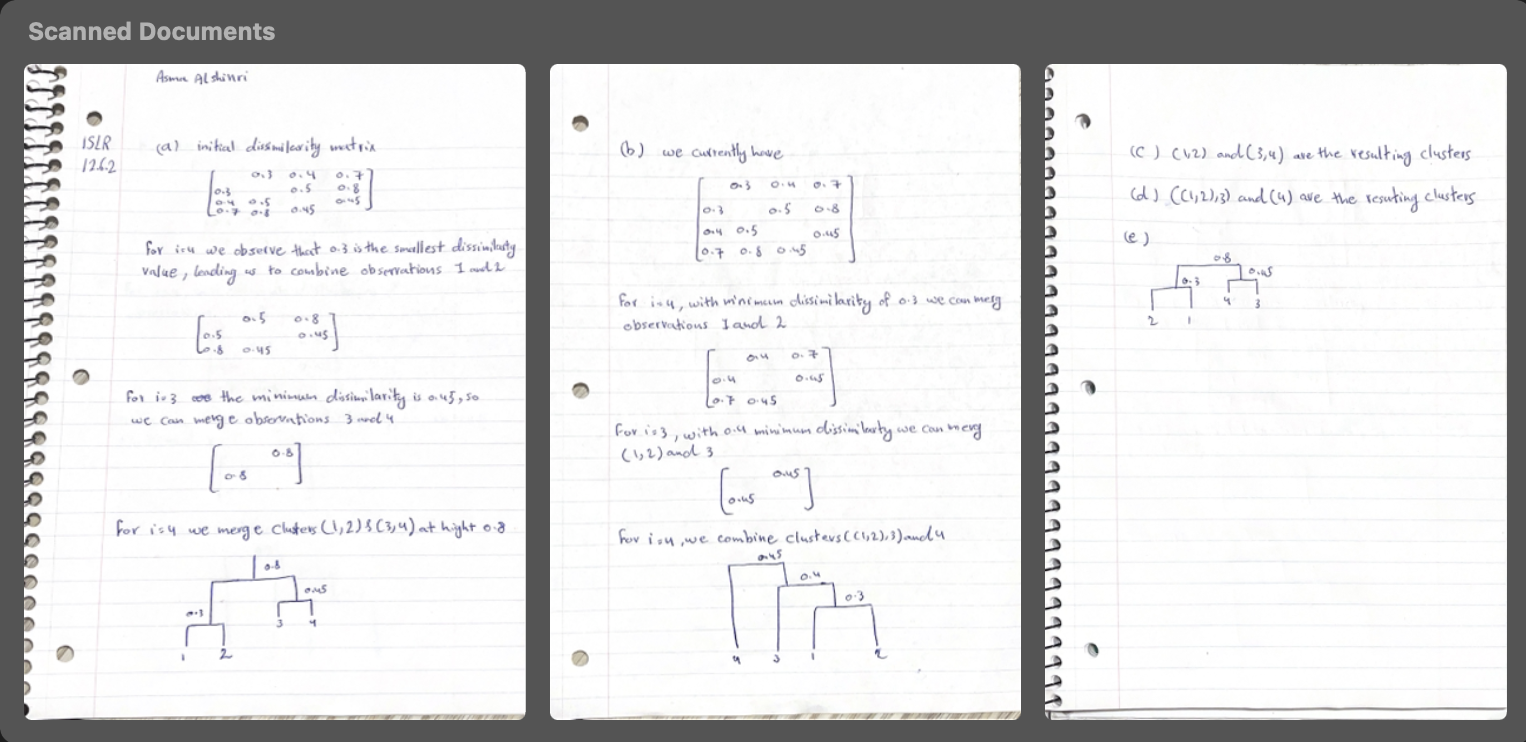